# PSTH Heatmap Analysis with Population Z-Score Normalization

This notebook creates heatmaps that combine PSTH data from multiple units with optional population-based z-score normalization.
- **Y-axis**: Units (sorted in ascending order)
- **X-axis**: Time relative to interval start (ms)
- **Color**: Firing rate (Hz) or Z-score (if normalized)

## Features
- **Standard Mode**: Raw firing rates displayed with 'hot' colormap
- **Population Z-Score Mode**: Data normalized using population statistics where z = (x - u) / s
  - x = data point (firing rate for a unit at a time bin)
  - u = population mean (mean firing rate across all units for that time bin)
  - s = population standard deviation (std across all units for that time bin)
- **Colormap**: 'RdBu_r' colormap for z-score normalized data

## Parameters
Configure the analysis parameters in the cell below and run the analysis.

In [4]:
# Import required modules
import sys
import os
sys.path.append('.')

from heatmap_utils import create_psth_heatmap, create_multiple_duration_heatmaps, plot_summary_statistics
import matplotlib.pyplot as plt

# Reload module for development
import importlib
if 'heatmap_utils' in sys.modules:
    importlib.reload(sys.modules['heatmap_utils'])
    from heatmap_utils import create_psth_heatmap, create_multiple_duration_heatmaps, plot_summary_statistics

In [5]:
# Configuration Parameters

# Data files (adjust paths as needed)
spikes_file = '../../Data/040425/spikes.csv'
intervals_file = '../../Data/040425/pico_time_adjust.csv'
spikes_path = os.path.abspath(spikes_file)
intervals_path = os.path.abspath(intervals_file)

# Analysis parameters
durations_ms = [5, 10, 25]        # Interval durations to analyze (ms)
units = None                      # Units to include (None = all units)
bin_size_ms = 0.1                 # Bin size in milliseconds
pre_interval_ms = 5               # Time before interval start (ms)
post_interval_ms = 10             # Time after interval start (ms)
smooth_window = 5                 # Smoothing window (bins)

# Population Z-Score Normalization
z_score_normalize = True          # Enable population-based z-score normalization

# Output settings
save_plots = True
output_dir = '../../Output/040425/normalized_heatmaps'


--- Processing duration: 5ms ---
Loading spike data from: /home/wanglab/spike-analysis/Data/040425/spikes.csv
Loading interval data from: /home/wanglab/spike-analysis/Data/040425/pico_time_adjust.csv
Loaded 290775 spikes and 28336 intervals
Available units: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45)]
Available interval durations (first 5): ['4.93ms', '5.00ms', '5.07ms', '5.13ms', '5.47ms']
Found 12672 intervals with d

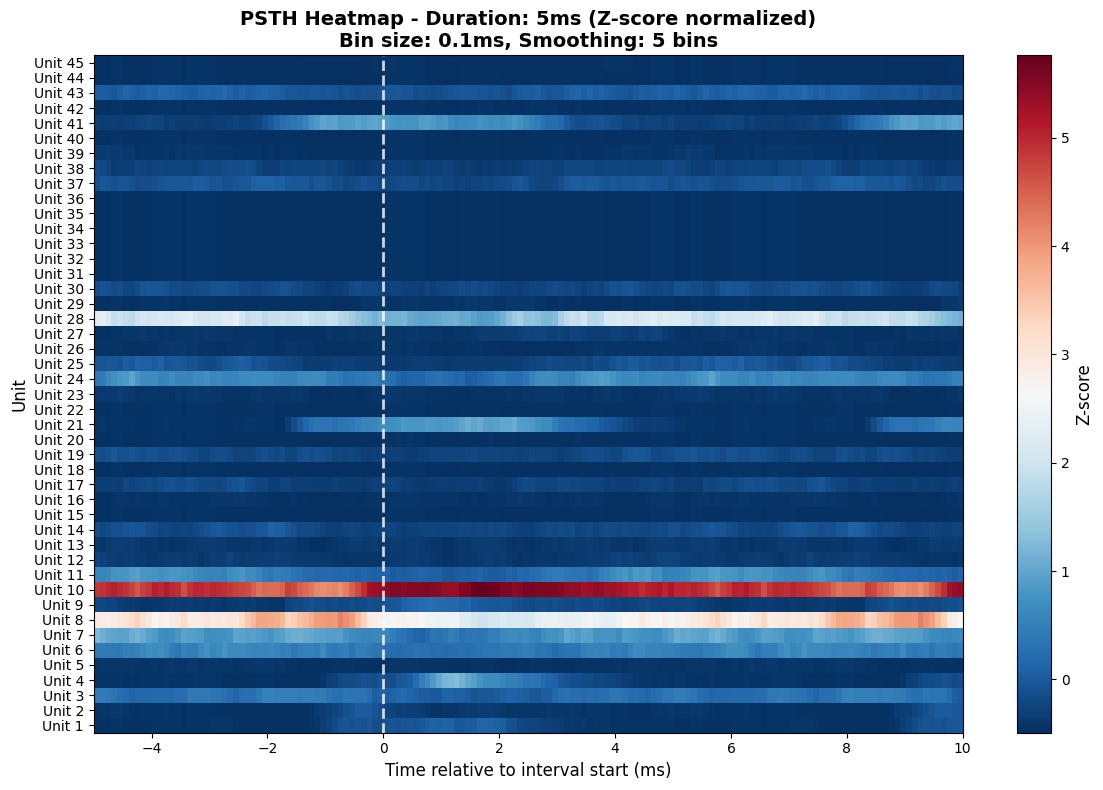

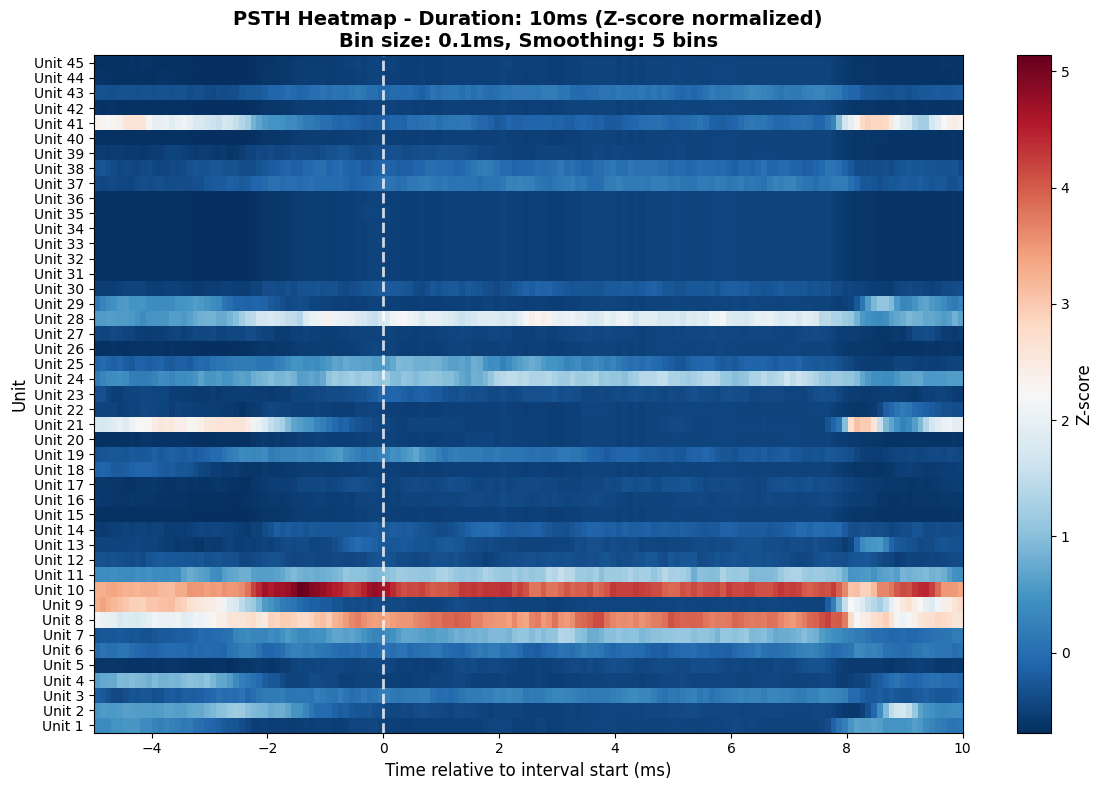

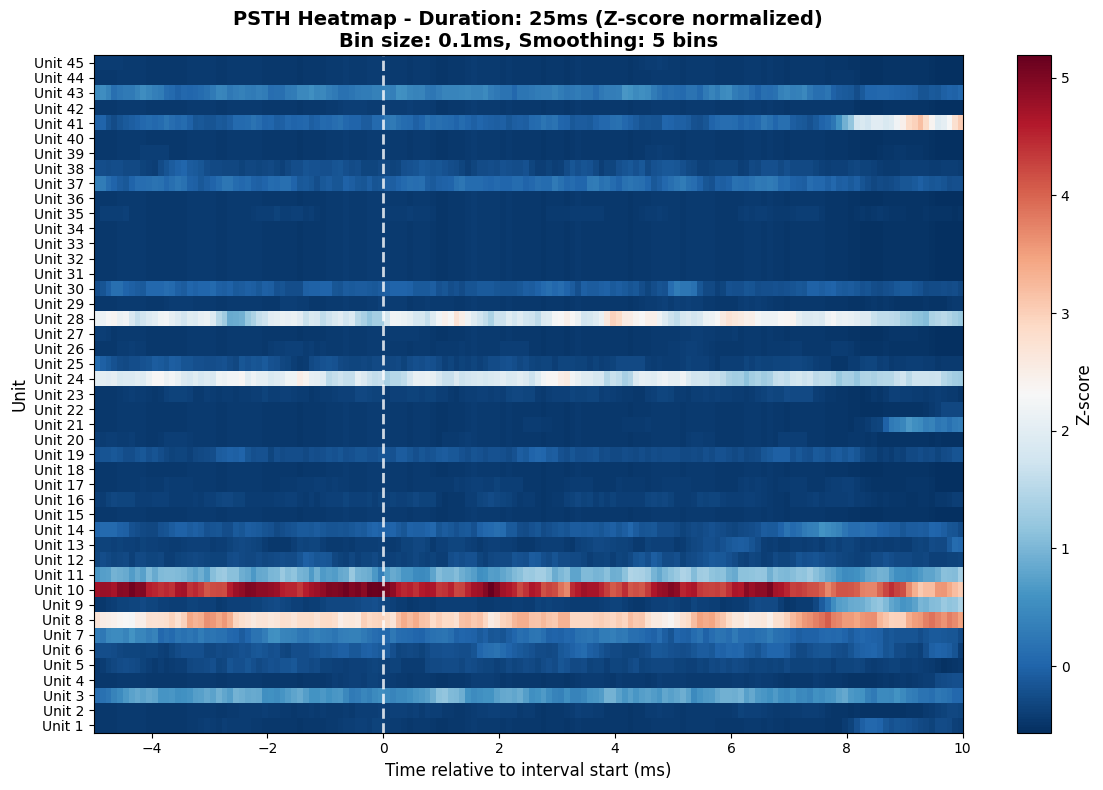

In [6]:
# Create PSTH heatmaps for all specified durations

save_dir = output_dir if save_plots else None

results = create_multiple_duration_heatmaps(
    spikes_file=spikes_path,
    intervals_file=intervals_path,
    durations_ms=durations_ms,
    units=units,
    bin_size_ms=bin_size_ms,
    pre_interval_ms=pre_interval_ms,
    post_interval_ms=post_interval_ms,
    smooth_window=smooth_window,
    z_score_normalize=z_score_normalize,
    save_dir=save_dir
)

print(f"\nGenerated {len(results)} heatmaps!")
if z_score_normalize:
    print("Population-based z-score normalization applied:")
    print("  z = (x - u) / s")
    print("  x = unit firing rate at time bin")
    print("  u = population mean across all units for that time bin")
    print("  s = population std across all units for that time bin")
else:
    print("Raw firing rates displayed")


Creating comparison: Raw vs Population Z-Score Normalized

--- Creating Raw Firing Rate Heatmaps ---

--- Processing duration: 5ms ---
Loading spike data from: /home/wanglab/spike-analysis/Data/040425/spikes.csv
Loading interval data from: /home/wanglab/spike-analysis/Data/040425/pico_time_adjust.csv
Loaded 290775 spikes and 28336 intervals
Available units: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45)]
Available interva

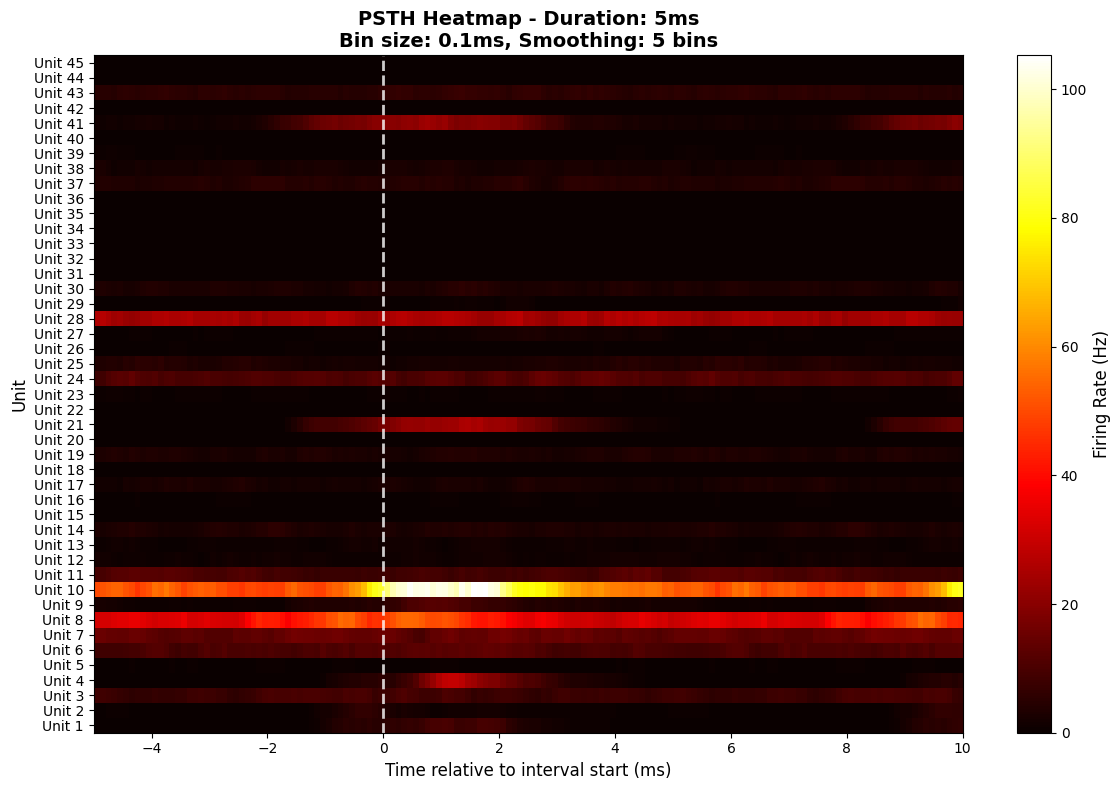

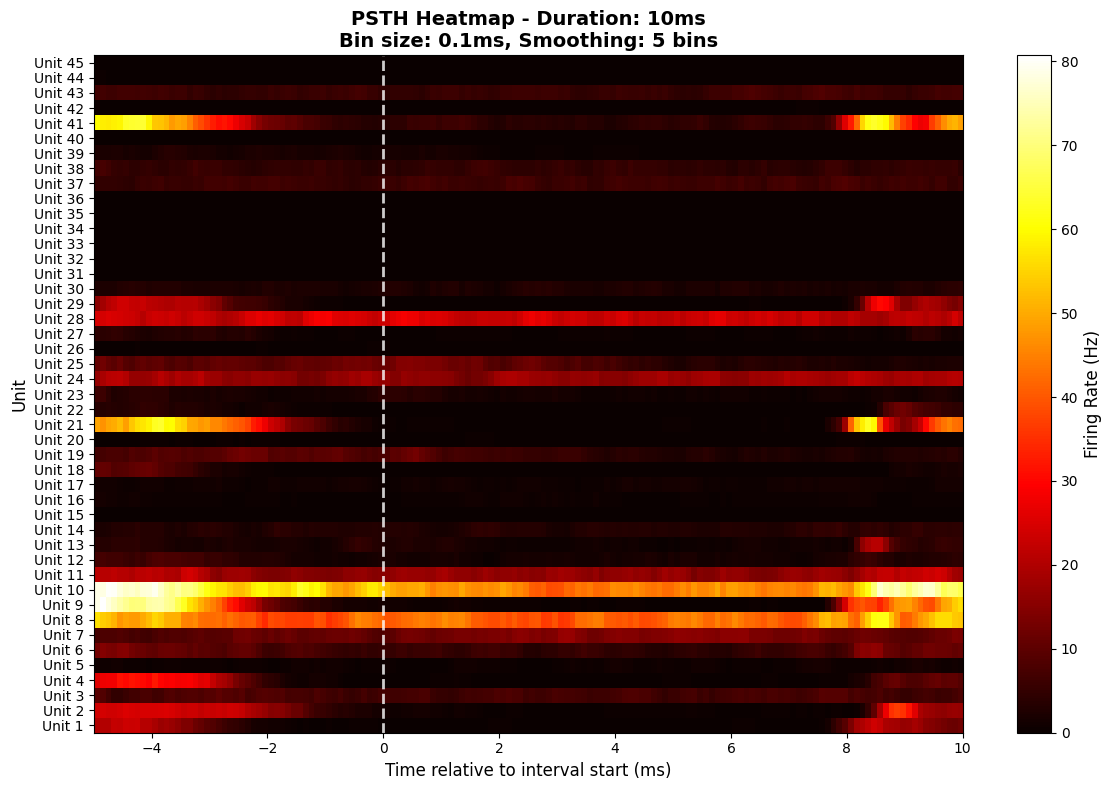

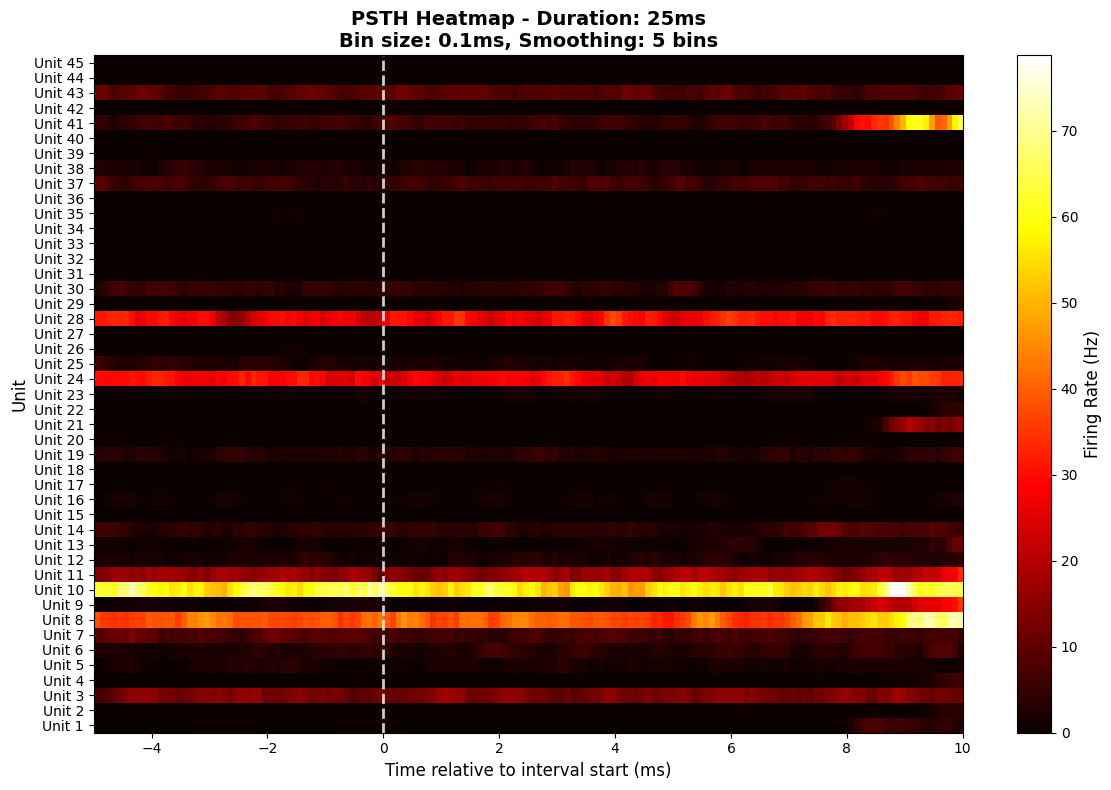

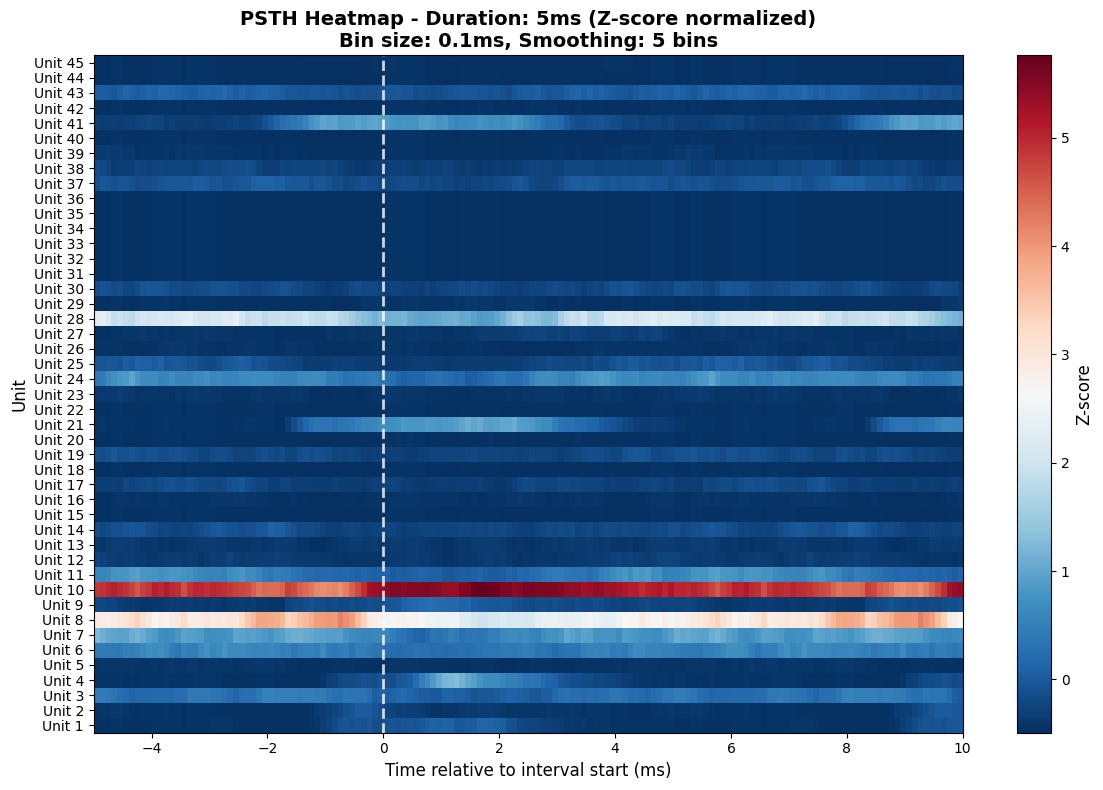

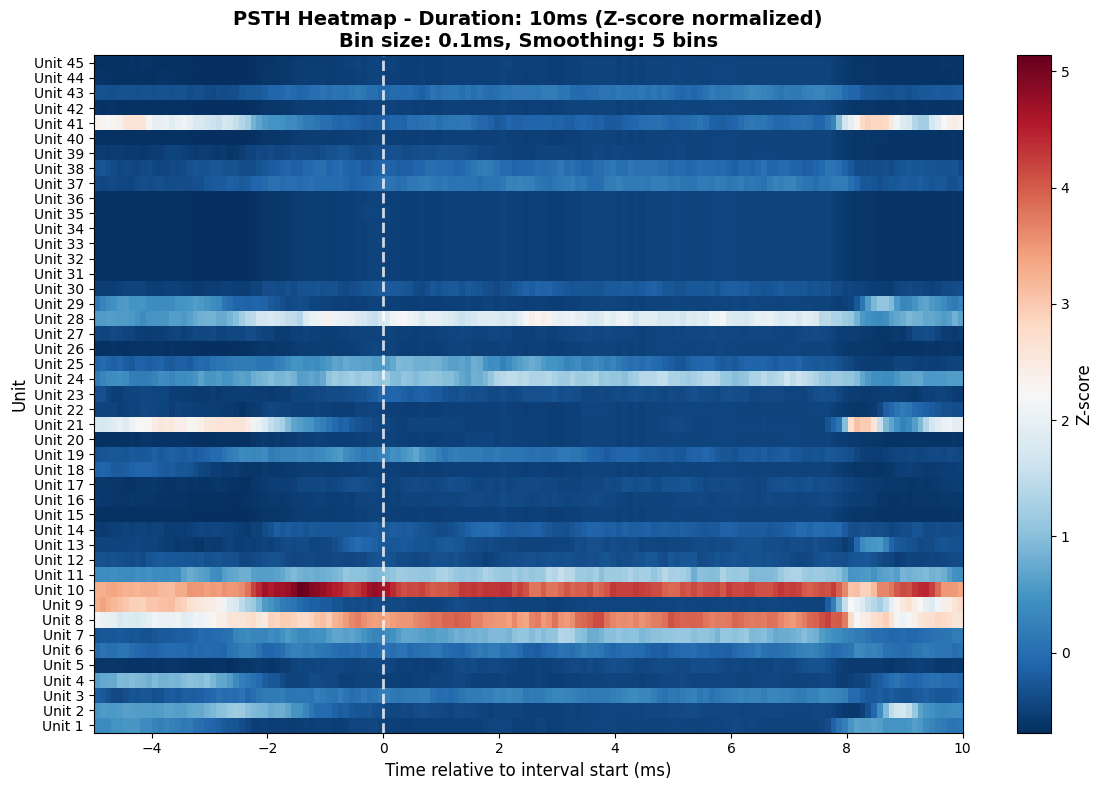

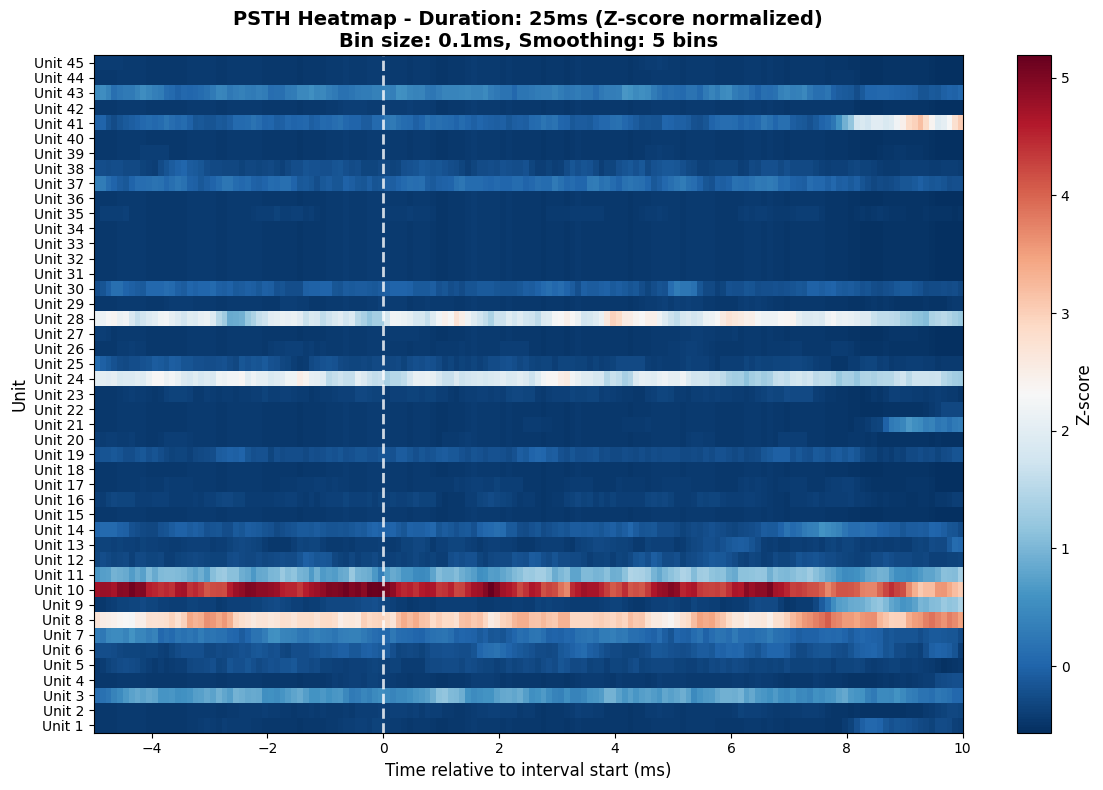

In [7]:
# Optional: Create comparison plots (both normalized and raw)
# This creates both versions for easy comparison

print("\n" + "="*50)
print("Creating comparison: Raw vs Population Z-Score Normalized")
print("="*50)

# First create raw firing rate heatmaps
print("\n--- Creating Raw Firing Rate Heatmaps ---")
raw_results = create_multiple_duration_heatmaps(
    spikes_file=spikes_path,
    intervals_file=intervals_path,
    durations_ms=durations_ms,
    units=units,
    bin_size_ms=bin_size_ms,
    pre_interval_ms=pre_interval_ms,
    post_interval_ms=post_interval_ms,
    smooth_window=smooth_window,
    z_score_normalize=False,  # Raw firing rates
    save_dir=save_dir
)

# Then create population z-score normalized heatmaps
print("\n--- Creating Population Z-Score Normalized Heatmaps ---")
normalized_results = create_multiple_duration_heatmaps(
    spikes_file=spikes_path,
    intervals_file=intervals_path,
    durations_ms=durations_ms,
    units=units,
    bin_size_ms=bin_size_ms,
    pre_interval_ms=pre_interval_ms,
    post_interval_ms=post_interval_ms,
    smooth_window=smooth_window,
    z_score_normalize=True,   # Population z-score normalized
    save_dir=save_dir
)

print(f"\nGenerated {len(raw_results)} raw heatmaps and {len(normalized_results)} normalized heatmaps!")
print("Files saved with '_zscore' suffix for normalized versions")
print("\nPopulation Z-Score Formula: z = (x - u) / s")
print("  x = firing rate of unit i at time bin j")
print("  u = mean firing rate across all units at time bin j")
print("  s = standard deviation across all units at time bin j")